In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
# read data
df = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = df.load_data()
print('X Training shape: ',X_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',X_test.shape)
print('Y Testing shape: ',y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


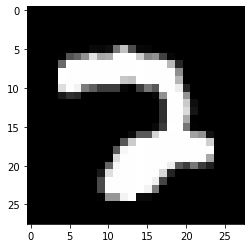

In [3]:
# sample data
plt.imshow(X_train[120], cmap='gray')
plt.show()

In [4]:
input_shape = (28,28,1)

In [6]:
# normalization
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [13]:
batch_size = 128
num_classes = 10
epochs = 3

In [8]:
# encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# define model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [18]:
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# train model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 48s 113ms/step - loss: 0.1712 - accuracy: 0.9472 - val_loss: 0.0796 - val_accuracy: 0.9795
Epoch 2/3
422/422 [==============================] - 55s 130ms/step - loss: 0.1246 - accuracy: 0.9620 - val_loss: 0.0602 - val_accuracy: 0.9833
Epoch 3/3
422/422 [==============================] - 52s 124ms/step - loss: 0.1075 - accuracy: 0.9668 - val_loss: 0.0518 - val_accuracy: 0.9862


In [15]:
print(history.history)

{'loss': [0.17118118703365326, 0.1245950236916542, 0.10748036950826645], 'accuracy': [0.9472036957740784, 0.9619629383087158, 0.9667778015136719], 'val_loss': [0.07957672327756882, 0.06021718308329582, 0.05180733650922775], 'val_accuracy': [0.9794999957084656, 0.9833333492279053, 0.9861666560173035]}


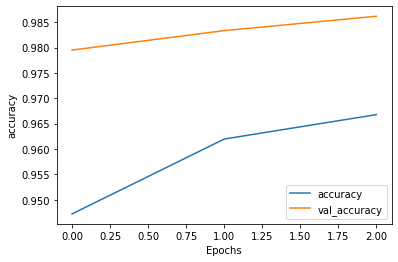

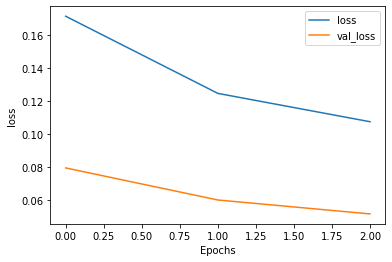

In [16]:
# plot accuracy and loss graphs
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
# save model 
model.save('mnist.h5')
model = load_model('mnist.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0